# SD-TSIA 204 Lab 1

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

### Q1

In [5]:
df = pd.read_csv("invest.csv", delimiter=' ')
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### Q2

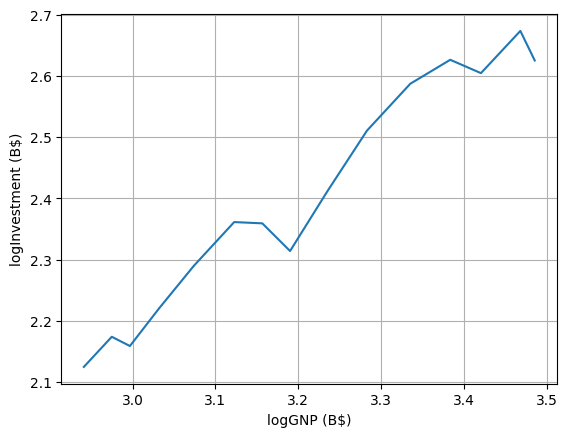

In [15]:
X, Y = np.log10(df["gnp"]), np.log10(df["invest"])
plt.plot(X,Y)
plt.xlabel("logGNP (B$)")
plt.ylabel("logInvestment (B$)")
plt.grid()
plt.show()

### Q3

In [34]:


def LinearRegressionQ3(X, Y, display=False):
    n = len(X)
    avgX = np.average(X)
    avgY = np.average(Y)
    Xn = np.full(len(X), avgX)
    Yn = np.full(len(Y), avgY)
    B1 = np.dot(X-Xn, Y-Yn)/np.dot(X-Xn,X-Xn)
    B0 = avgY - B1*avgX

    sigma2 = sum((Y[i] - (B0 + B1*X[i]))**2 for i in range(n))/(n-2)

    VB0 = sigma2*(1/n + avgX**2/np.dot(X-Xn,X-Xn))
    VB1 = sigma2/np.dot(X-Xn,X-Xn)


    Yest = B1*X + B0

    R2 = 1- np.dot(Yest-Y, Yest-Y)/np.dot(Y-Yn, Y-Yn)

    if display:
        print("B0 = ", B0)
        print("B1 = ", B1)
        print("VB0 = ", VB0)
        print("VB1 = ", VB1)
        print("R2 = ", R2)
    return B0, B1, VB0, VB1, R2

In [46]:
B0, B1, VB0, VB1, R2 = LinearRegressionQ3(X, Y)

### Q4

In [42]:
def isin(x, c1, c2):
    return x >= c1 and x <= c2

In [82]:
def test_student(X, Y, B0, B1, VB0, VB1, a, display=False):
    n=len(X)
    statB0 = B0/np.sqrt(VB0)
    statB1 = B1/np.sqrt(VB1)
    [t1,t2] =  stats.t(df=n-(2)).ppf((a/2, 1-a/2))

    if display:
    
        if isin(statB0, t1, t2):
            print("B0 passes test for confidence ", a)
        else:
            print("B0 don't pass test for confidence ", a)
        
        if isin(statB1, t1, t2):
            print("B1 passes test for confidence ", a)
        else:
            print("B1 don't pass test for confidence ", a)
    
    return t1, t2


In [54]:
test_student(X, Y, B0, B1, VB0, VB1,  0.05)

B0 don't pass test for confidence  0.05
B1 don't pass test for confidence  0.05


### Q5

In [104]:
def prediction(X,Y, x_pred, display=False):
    # x_pred is IN LOG SCALE !!!!!
    n=len(X)
    B0, B1, VB0, VB1, R2 = LinearRegressionQ3(X, Y, display=False)
    avgX = np.average(X)
    Xn = np.full(n, avgX)
    y_pred = 10**(B1*x_pred + B0)
    if display: print("Predicted value = ", y_pred)
    t1, t2 = test_student(X, Y,B0, B1, VB0, VB1, 0.1)
    s = np.sqrt(sum((Y[i] - (B0 + B1*X[i]))**2 for i in range(n))/(n-2))

    CI1 = B0 + B1*x_pred + t1*s*np.sqrt(1/n + (x_pred - avgX)**2/np.dot(X-Xn, X-Xn))
    CI2 = B0 + B1*x_pred + t2*s*np.sqrt(1/n + (x_pred - avgX)**2/np.dot(X-Xn, X-Xn))
    CI1 = 10**CI1
    CI2 = 10**CI2
    PI1 = B0 + B1*x_pred + t1*s*np.sqrt(1 + 1/n + (x_pred - avgX)**2/np.dot(X-Xn, X-Xn))
    PI2 = B0 + B1*x_pred + t2*s*np.sqrt(1 + 1/n + (x_pred - avgX)**2/np.dot(X-Xn, X-Xn))
    PI1 = 10**PI1
    PI2 = 10**PI2

    return y_pred, CI1, CI2, PI1, PI2

In [103]:
prediction(X,Y, 3, display=True)

Predicted value =  155.979427931055


(155.979427931055,
 0.4026482240828374,
 0.455349769746193,
 0.362368070689726,
 0.5059655939770187)

### Q6

In [112]:
def plot_prediction(X,Y, B0, B1):
    plt.plot(X,Y)
    plt.xlabel("logGNP (B$)")
    plt.ylabel("logInvestment (B$)")
    X_pred = np.linspace(min(X), max(X), 100)
    Y_pred, Y_low, Y_high, Y_P1, Y_P2 = [], [], [], [], []
    for x_p in X_pred:
        y_pred, CI1, CI2, PI1, PI2 = prediction(X,Y, x_p)
        Y_pred.append(y_pred)
        Y_low.append(CI1)
        Y_high.append(CI2) 
        Y_P1.append(PI1)
        Y_P2.append(PI2)

    plt.plot(X_pred, np.log10(Y_pred), label="regression")
    plt.plot(X_pred, np.log10(Y_low), color="red")
    plt.plot(X_pred, np.log10(Y_high), color="green")
    plt.plot(X_pred, np.log10(Y_P1), color="black")
    plt.plot(X_pred, np.log10(Y_P2), color="black")
    plt.legend()
    plt.grid()
    plt.show()

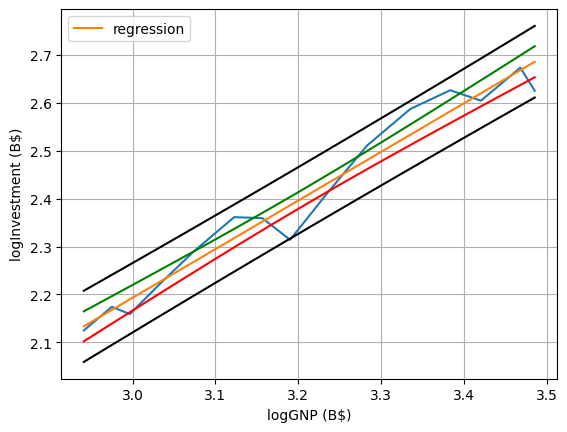

In [113]:
plot_prediction(X,Y,B0,B1)

### Q7

In [123]:
reg = LinearRegression().fit(np.array(X).reshape(-1,1),Y)
print("B0 =", reg.intercept_)
print("B1 =", reg.coef_[0])

B0 = -0.8527768816035084
B1 = 1.0152814015988716


### Q8

In [134]:
def plot_prediction_sklear(X,Y):
    reg = LinearRegression().fit(np.array(X).reshape(-1,1),Y)
    B0, B1 = reg.intercept_, reg.coef_[0]
    plt.scatter(X,Y, label="data", color="blue")
    plt.xlabel("logGNP (B$)")
    plt.ylabel("logInvestment (B$)")
    X_pred = np.linspace(min(X), max(X), 100)
    Y_pred, Y_low, Y_high, Y_P1, Y_P2 = [], [], [], [], []
    for x_p in X_pred:
        y_pred, CI1, CI2, PI1, PI2 = prediction(X,Y, x_p)
        Y_low.append(CI1)
        Y_high.append(CI2) 
        Y_P1.append(PI1)
        Y_P2.append(PI2)
    
    for x_p in X:
        y_pred, CI1, CI2, PI1, PI2 = prediction(X,Y, x_p)
        Y_pred.append(y_pred)

    plt.scatter(X, np.log10(Y_pred), label="regression", color="orange")
    plt.plot(X_pred, np.log10(Y_low), color="red")
    plt.plot(X_pred, np.log10(Y_high), color="green")
    plt.plot(X_pred, np.log10(Y_P1), color="black")
    plt.plot(X_pred, np.log10(Y_P2), color="black")
    plt.legend()
    plt.grid()
    plt.show()

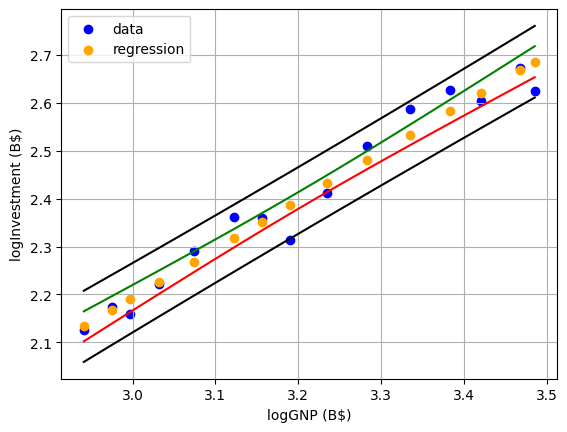

In [135]:
plot_prediction_sklear(X,Y)

### Q9

In [137]:
G = np.array(X).T.dot(np.array(X))

154.7084571947223